# Paper 3 - Dataset Exploration
### Rishi Gummakonda - BIS 397, Spring 2021, Submitted April 25th, 2021

## Introduction:
<p>Basketball is my favorite sport. At its core, its a game for kids. But to me, and so many people, its a lot more. Everything about it is capitvating: the offense, the defense, the personalities, the culture, and especially the passion. I could go on and on. Even though I was never blessed with the physical gifts or work ethic to take my playing skills anywhere besides the driveway or the local park, it would still be a dream to go to the NBA. </p>

<p>Although I won't hear my name called on any draft night, I think I still have a chance to make it to the pros. It would be my dream to work in the front office of any NBA team working on basketball analytics or doing anything on the business side. </p>

A couple of years ago I found the website for the [2019 NBA Hackathon](https://hackathon.nba.com). The hackathon has two prompts, one for basketball analytics, another for business. This project will be based on the business prompt from the 2019 NBA Hackathon. 

The business prompt and dataset were originally on the hackathon's webpage but have since been removed. Even though I never ended up enrolling in the competition, I downloaded all the prompts and datasets. The original business prompt can be found [here](https://drive.google.com/file/d/1sXCpQhgL0pvTSDY_grhz1EN7ItBLPB0a/view?usp=sharing).

The NBA provided a sample dataset of 1,000 (real) Instagram posts by @nba since October 1, 2017 (211 individual photos, 109 photo albums, and 680 videos). It is a holdout/test set from an identical training dataset of 7,766 (real) Instagram posts by @nba in the same timeframe (1,595 individual photos, 713 photo albums, and 5,458 videos). 

The holdout set can be found [here](https://drive.google.com/file/d/1-ObHVhRkxaBzxN41JxXddaJzuc3Njeyj/view?usp=sharing). 
The training set can be found [here](https://drive.google.com/file/d/1nljN5HI6Sb7YTegEUF0CSzl3bPLg7wR3/view?usp=sharing).

In [1]:
#Import pandas to read in dataset
import pandas as pd

In [2]:
#Read in holdout set
holdout = pd.read_csv("/Users/rishigummakonda/Desktop/BIS 397/final/holdout_set.csv",encoding='mac_roman')

#Read in training set 
training = pd.read_csv('/Users/rishigummakonda/Desktop/BIS 397/final/training_set.csv',encoding='mac_roman')

In [3]:
training.head()

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


In [4]:
holdout.head()

,Engagements,Followers at Posting,Created,Type,Description
0,NaN,36984682,2019-05-22 00:31:55 EDT,Photo,The @raptors even up the Eastern Conference Fi...
1,NaN,36984682,2019-05-21 23:20:41 EDT,Photo,The @raptors even the Eastern Conference Final...
2,NaN,36984682,2019-05-21 21:18:51 EDT,Video,@sergeibaka keeps it alive for the @raptors! (...
3,NaN,36955156,2019-05-21 18:20:09 EDT,Video,???? The SUPERHUMAN HANDS of Giannis & Kawhi ?...
4,NaN,36955156,2019-05-21 15:04:31 EDT,Video,?? the @raptors & @bucks in transition! #NBABr...


<p>Both the holdout set and training set include the following features: </p>
<ol>
<li>Engagements: Instagram "engagement" numbers are the sum of likes, comments, and saves on a certain post. According to the NBA, the engagement numbers are not real, they are artficially generated.There’s no (intentional) correlation with the real-life engagement totals belonging to posts by @nba.</li>
<li>Followers at Posting: number of followers at the time of posting</li>
<li>Created: Datetime stamp of post (Eastern time)</li>
<li>Type: Classification of post as Individual Photo, Photo Album, or Video</li>
<li>Description: @nba‘s post caption / description</li>
</ol>

<p> The main difference between the training and holdout set is that the holdout set does not have any engagement numbers. The original prompt asks the contestant to predict engagement numbers for each post within the holdout set. This original prompt can be used as one of the three business questions. </p>

<p> The data provided can provide many insights regarding what makes NBA instagram posts popular or unpopular. Using AI to determine the factors that drive engagement allows the NBA to be more efficent with their marketing. With the insights, they can tailor their strategy to make mosts more engaging, and ultimately boost the NBA brand.  Instagram is especially great for advertisting a product. AI can play a powerful role in marketing, and the NBA should utilize it to its benefit.</p>

<p> There are many factors that may drive a post engagement that are not included within the dataset. There may be specific events or time periods that may drive or stifle engagement, or determine the kind of posts the NBA chooses to display. For example, when Kobe Bryant suddenly died over a year ago, the NBA's instagram centered around his legacy. This defintely effected engagement numbers abnormally. This would be a greater issue if the engagement numbers given by the NBA were not artificially generated. However, because engagements are artifically generated, it can be assumed that any other factors that may drive engagement are not relevant.</p>

## Detailed Description:

<p> The numerical variables are Engagments, and Followers at Posting. Categorical variables are Created, Type, and Description. To analyze Created, the data needs to be transformed from a DateTime object into smaller categories. For example, it may be able to be broken down into the numerical following: day of the week (1 to 7), hour and month. To analyze Type, the data can be transformed from the three types to numerical representations (1, 2, 3). Description can be analyzed through sentiment analysis. Other numerical data can be gathered from the descriptions such as length, types of characters used, and if the account is tagged.

In [5]:
holdout.dtypes

Engagements             float64
Followers at Posting      int64
Created                  object
Type                     object
Description              object
dtype: object

In [6]:
holdout['Created'] = pd.to_datetime(holdout['Created'])

In [7]:
holdout['month'] = holdout.Created.dt.month
holdout['weekday'] = holdout.Created.dt.weekday
holdout['hour'] = holdout.Created.dt.hour
holdout.head()

,Engagements,Followers at Posting,Created,Type,Description,month,weekday,hour
0,NaN,36984682,2019-05-22 00:31:55-04:00,Photo,The @raptors even up the Eastern Conference Fi...,5,2,0
1,NaN,36984682,2019-05-21 23:20:41-04:00,Photo,The @raptors even the Eastern Conference Final...,5,1,23
2,NaN,36984682,2019-05-21 21:18:51-04:00,Video,@sergeibaka keeps it alive for the @raptors! (...,5,1,21
3,NaN,36955156,2019-05-21 18:20:09-04:00,Video,???? The SUPERHUMAN HANDS of Giannis & Kawhi ?...,5,1,18
4,NaN,36955156,2019-05-21 15:04:31-04:00,Video,?? the @raptors & @bucks in transition! #NBABr...,5,1,15


In [8]:
training['Created'] = pd.to_datetime(training['Created'])

In [9]:
training['month'] = training.Created.dt.month
training['weekday'] = training.Created.dt.weekday
training['hour'] = training.Created.dt.hour
training.head()

,Engagements,Followers at Posting,Created,Type,Description,month,weekday,hour
0,502093,36984682,2019-05-21 23:30:51-04:00,Video,The @raptors bench trio of @sergeibaka @norman...,5,1,23
1,603380,36984682,2019-05-21 22:53:33-04:00,Video,@kyle_lowry7 pulls from deep for the @raptors ...,5,1,22
2,603380,36984682,2019-05-21 22:19:58-04:00,Video,@k_mid22 with some english on the @bucks dime!,5,1,22
3,725100,36984682,2019-05-21 22:02:41-04:00,Video,Kawhi punches it home with the left on TNT!,5,1,22
4,661446,36984682,2019-05-21 20:47:49-04:00,Video,@giannis_an34 goes baseline early to rock the ...,5,1,20


In [10]:
training.describe()

,Engagements,Followers at Posting,month,weekday,hour
count,7.766000e+03,7.766000e+03,7766.000000,7766.000000,7766.000000
mean,5.923129e+05,3.042770e+07,5.996652,3.081767,15.925444
std,1.792682e+05,3.748957e+06,3.910491,1.970062,7.319283
min,1.278160e+05,2.487554e+07,1.000000,0.000000,0.000000
25%,4.173900e+05,2.698910e+07,3.000000,1.000000,12.000000
50%,6.397285e+05,3.004747e+07,5.000000,3.000000,19.000000
75%,7.216282e+05,3.392854e+07,10.000000,5.000000,21.000000
max,1.129585e+06,3.698468e+07,12.000000,6.000000,23.000000


In [11]:
holdout.describe()

,Engagements,Followers at Posting,month,weekday,hour
count,0.0,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,NaN,3.043693e+07,6.038000,3.066000,16.212000
std,NaN,3.777442e+06,3.965385,1.988366,7.193247
min,NaN,2.487554e+07,1.000000,0.000000,0.000000
25%,NaN,2.687360e+07,3.000000,1.000000,13.000000
50%,NaN,2.998708e+07,5.000000,3.000000,19.000000
75%,NaN,3.391119e+07,10.000000,5.000000,22.000000
max,NaN,3.698468e+07,12.000000,6.000000,23.000000


The training and holdout sets have similar descriptive statistics, this indicates that the holdout set made by the NBA is representative of the entire dataset.

In [12]:
holdout.Type.value_counts()

Video    680
Photo    211
Album    109
Name: Type, dtype: int64

In [13]:
training.Type.value_counts()

Video    5458
Photo    1595
Album     713
Name: Type, dtype: int64

In [14]:
#figuring out if the training dataset has the same or similar ratio of Type compared to the holdout set.
training.Type.value_counts()/7766

Video    0.702807
Photo    0.205382
Album    0.091810
Name: Type, dtype: float64

The two sets have a similar breakdown of Type, although there are slightly lower ratio of Videos and a higher ratio of Photo Albums in the holdout set.

In [15]:
#basic data visualization of Type of posts vs. Engagement
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

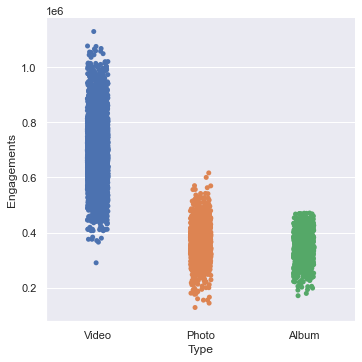

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Type", y="Engagements", data=training)

<AxesSubplot:xlabel='hour', ylabel='Engagements'>

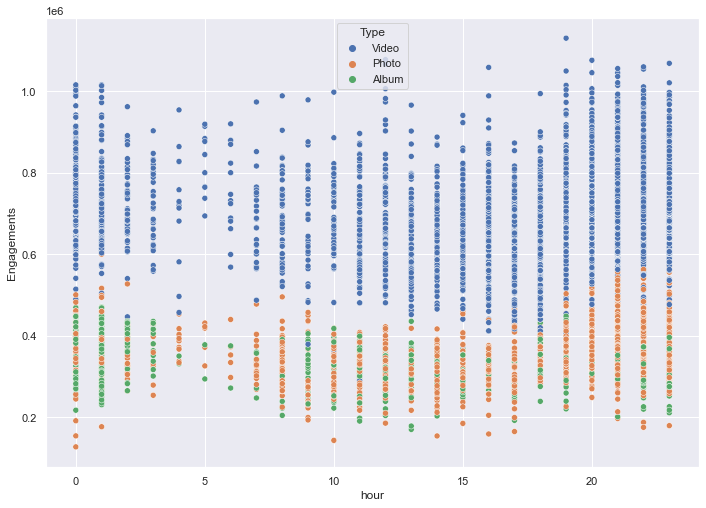

In [17]:
sns.scatterplot(x="hour", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='Engagements', ylabel='hour'>

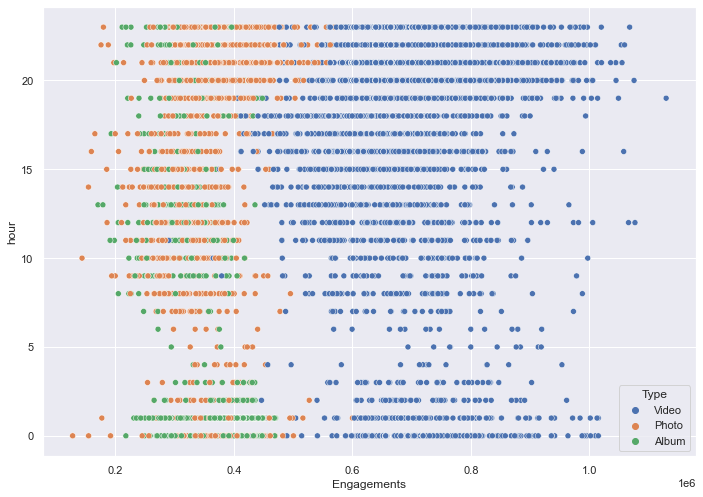

In [18]:
sns.scatterplot(x="Engagements", y="hour", data=training, hue="Type")

The two graphs above demonstrate that there seems to be higher engagement on every kind of post in between hours of 18:00 to 1:00 relative to all other hours. This does not defintely indicate correlation between time of post and quality of post as those are also the hours where the NBA has the most games live on TV.

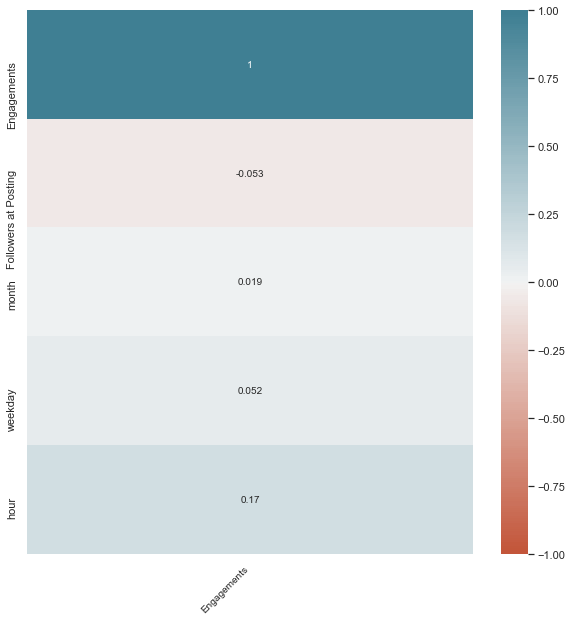

In [19]:
plt.figure(figsize=(10,10))
corr = training.corr()[["Engagements"]].round(3)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True,
    annot_kws={"size": 10}
    
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
);

This correlation matrix displays that none of the numerical factors have high correlation to Engagement. The highest correlation is the hour it is posted, although it is weak.

<AxesSubplot:xlabel='Followers at Posting', ylabel='Engagements'>

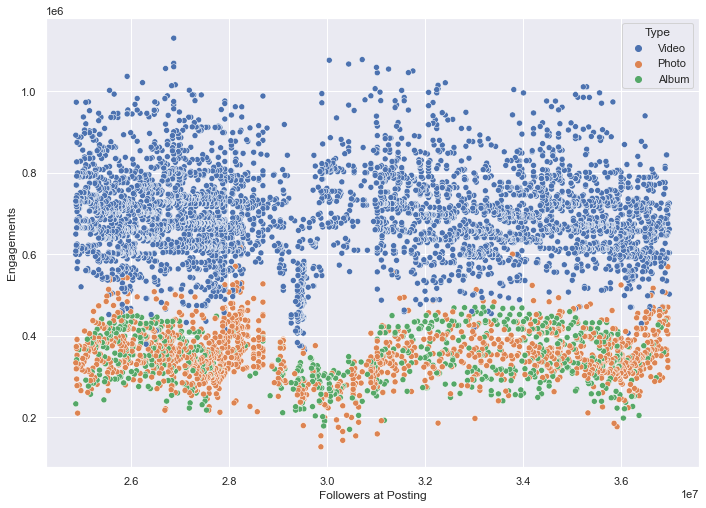

In [20]:
sns.scatterplot(x="Followers at Posting", y="Engagements", hue="Type", data=training)

These graphs display that Videos have higher engagement numbers compared to Photos and Albums. Photos and Albums generally have similar engagement numbers. This patterns holds true as number of followers increase and time posted varies.

In [21]:
from statistics import mean
mean(training[training['Type']=='Video']['Engagements'])

692773.5756687431

In [22]:
mean(training[training['Type']=='Photo']['Engagements'])

357547.36363636365

In [23]:
mean(training[training['Type']=='Album']['Engagements'])

348465.3394109397

The above mean Engagement values broken down by Type back up the previous assumptions made from the graphs.

## AI Business Questions:

### Question 1 - the original prompt: 
**Can we accurately predict Engagment numbers for a random sample of a 1000 NBA instagram posts given the number of Followers, Type of post, time posted, and caption descriptions?**

The original prompt asks the contestant to predict the Engagements for each of the 1000 posts in the holdout set. The training set can be used to train the models so the models can get accurate results on the test set. This can be done through regression models, particularly linear regression. The success measure of choice is Mean Absolute Percentage Error (MAPE) on Engagements. A description is below:

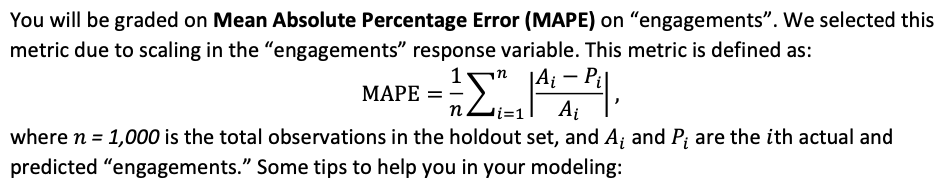

<p>All of the numerical features can be used for this prompt. Categorical varibles can be transformed to numerical representations. This is demonstrated above as the Created datetime value was changed to be represented by indivual month, hour and day of the week. In this scenario, Engagements would be the target varible (dependent variable). All others would be independent variables.</p>

**A subquestion within this prompt is: Can we determine what the optimal features are for an Instagram post?** This may be difficult to answer because there are many variables within the real world that may drive Instagram engagement.

<p> Two more business questions can be derived from the original prompt. </p>

### Question 2 - Natrual Language Processing:
**Given the caption of a NBA Instagram post, can we determine what elements of the caption correlate to success (higher engagement)?**

<p> The dataset provides captions for every post within the dataset under the Description tab. Emojis are represented by '??', while @ indicates wheter another user is tagged in the caption. Using TensorFlow's Natural Language Processsing capabilities, it may be possible to detect what words or mentions within the caption lead to more engagement. This will require data preprocessing and data transformation/standarization of the Description variable. </p>  
<p> In this scenario, the dependent variable is engagement. The indepdent varaibles would be the different words within the description. This is a particularly interesting question to answer because we can then determine which players may have the most popularity. We may be able to correlate real-world events to certain engagement numbers. Data on this could help the NBA determine how to format their captions, or know what players to emphasize on their Instagram.</p>

### Question 3 - Time Series Analysis and Forecasting
**Given only date and time created of each sample Instagram post, is it possible to accurately forecast future Engagement for the NBA Instagram?**

The goal of time series analysis is to see how the target variable changes over time and ultimately use the results to forecast. Using the time data and engagement, we can determine seasonality, its stationarity (whether its statistical properties change over time), and if it Engagement is autocorrelated (if similarity is related to time-lag). 

This is an interesting question to explore because although the NBA is a seasonal sport, it is in the best interest of the NBA to have high engagement numbers throughout the year. If it is possible to predict future performance accurately, it could help the NBA identify ways to increase user engagement during the offseason.

An alternate question relating to time-series analysis could be: **Given only date and time created of each sample Instagram post, is it possible to accurately forecast future number of followers for the NBA Instagram?**

## Conclusion

The NBA, like all other sports leagues, are in the entertainment business. Like with any entertainment product, the NBA can attract new or retain old viewers through social media engagement. It is imperative for the NBA to make their marketing more efficent and effective because of the competition on these platforms. Even though the Engagement numbers in the training dataset are artificially generated, the NBA could use these results on real-world data. The first question is in regards to determining Engagement based upon all the data provided. The second question aims to determine how captions may correlate to engagement. The third question aims to predict future engagement on Instagram using time data. All of these questions are aimed the assist the NBA in determining how to best utilize Instagram as a platform. Initial data exploration indicates weak correlation between Engagement and the other features in the dataset. Nevertheless, through further analysis the goal is to determine what elements correlate to success.